In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

In [8]:
def threshold_image(im,th):
  threshold_im = np.zeros(im.shape)
  threshold_im[im >= th] = 1
  return threshold_im

def compute_otsu_criteria(im, th):
  thresholded_im = threshold_image(im,th)
  nb_pixels = im.size
  nb_pixels1 = np.count_nonzero(thresholded_im)

  weight1 = nb_pixels1 / nb_pixels
  weight0 = 1 - weight1
  if weight1 == 0 or weight0 == 0 :
    return np.inf

  val_pixels1 = im[thresholded_im == 1]
  val_pixels0 = im[thresholded_im == 0]

  var0 = np.var(val_pixels0) if len(val_pixels0) > 0 else 0
  var1 = np.var(val_pixels1) if len(val_pixels1) > 0 else 0

  return weight0 * var0 + weight1 * var1

def find_best_threshold(im):
  threshold_range = range(np.max(im) + 1) #0-255
  criterias = [compute_otsu_criteria(im,th) for th in threshold_range]
  best_threshold = threshold_range[np.argmin(criterias)]

  return best_threshold

In [22]:
path = "Percobaan_1/image.jpg"
im = np.asarray(Image.open(path).convert('L')) #L untuk luminance (merubah menjadi skala abu - abu)
im_otsu = threshold_image(im, find_best_threshold(im))
print("Ukuran gambar = {}".format(im.shape))
print("Threshold terbaik = {}".format(find_best_threshold(im)))

Ukuran gambar = (1080, 1920)
Threshold terbaik = 87


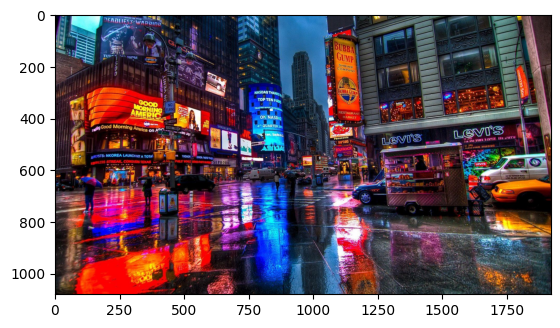

In [12]:
image = mpimg.imread(path)
plt.imshow(image)

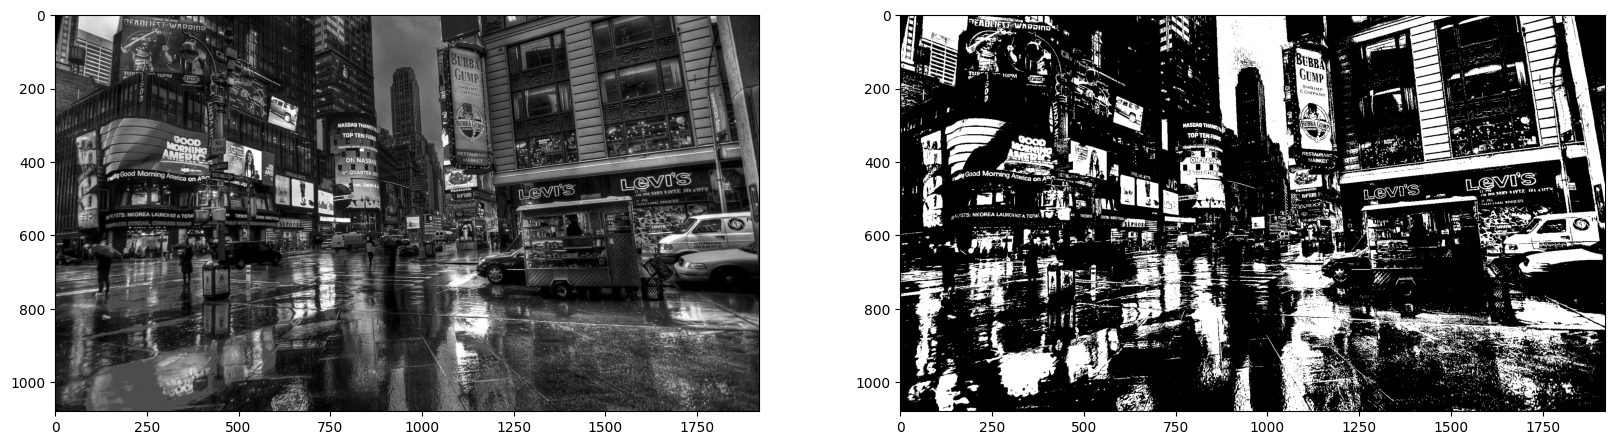

In [13]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.imshow(im, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(im_otsu, cmap = 'gray')